In [2]:
from google.colab import files
uploaded = files.upload()  # Esto abrirá un cuadro de diálogo para que subas el archivo ZIP

Saving PlantVillage.zip to PlantVillage.zip


In [3]:
import zipfile

# Descomprimir el archivo ZIP que has subido (cambia el nombre del archivo si es diferente)
with zipfile.ZipFile('PlantVillage.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/PlantVillage')  # Extrae el contenido a un directorio específico


In [4]:
import os

# Verificar si el directorio de PlantVillage se extrajo correctamente
os.listdir('/content/PlantVillage')


['plantvillage', 'PlantVillage']

Found 33022 images belonging to 2 classes.
Found 8254 images belonging to 2 classes.


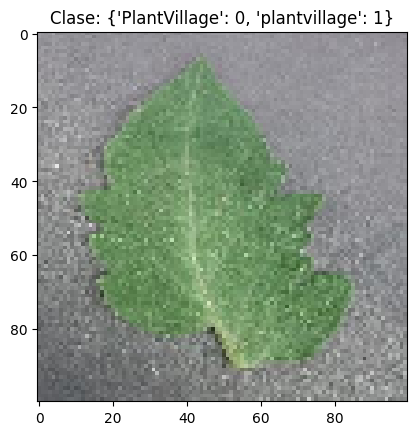

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1032/1032 ━━━━━━━━━━━━━━━━━━━━ 532s 514ms/step - accuracy: 0.4973 - loss: 0.7125 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/5
  57/1032 ━━━━━━━━━━━━━━━━━━━━ 7:41 474ms/step - accuracy: 0.4969 - loss: 0.6933

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping


# Ruta al directorio donde se encuentra tu dataset PlantVillage (descomprimido)
dataset_dir = '/content/PlantVillage'  # Cambia esta ruta si es necesario

# Crear un generador de datos para cargar las imágenes
datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)

# Cargar los datos de entrenamiento
train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(100, 100),  # Ajusta el tamaño de las imágenes según lo necesites
    batch_size=32,
    class_mode='categorical',  # Cambia a 'binary' si tienes un problema binario
    subset='training',  # Usar 'training' para los datos de entrenamiento
    shuffle=True
)

# Cargar los datos de validación
validation_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',  # Cambia a 'binary' si tienes un problema binario
    subset='validation',  # Usar 'validation' para los datos de validación
    shuffle=False
)

# Visualización de algunas imágenes del dataset de entrenamiento
imagen, etiqueta = next(train_generator)  # Obtiene el primer lote del generador

plt.figure()
plt.imshow(imagen[0], cmap=plt.cm.binary)  # Muestra la primera imagen
plt.title(f"Clase: {train_generator.class_indices}")
plt.show()

# Crear un modelo de red neuronal convolucional
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=100, activation="relu"),
    tf.keras.layers.Dense(len(train_generator.class_indices), activation="softmax")  # Número de clases
])

# Compilar el modelo
modelo.compile(
    optimizer="adam",
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),  # Corregido
    metrics=["accuracy"]
)

# Configuración de EarlyStopping para detener el entrenamiento si no hay mejora
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenar el modelo con EarlyStopping
modelo.fit(
    train_generator,
    epochs=5,  # Número de épocas, puedes ajustarlo según lo necesites
    validation_data=validation_generator,
    callbacks=[early_stopping]  # Detiene el entrenamiento si no mejora
)

# Evaluación del modelo en el conjunto de validación
modelo.evaluate(validation_generator)

# Realizar predicciones con el conjunto de prueba (si tienes un conjunto de prueba separado)
# Si no, puedes usar las imágenes de validación para ver predicciones
for imagen, etiqueta in validation_generator:  # Remove .take(1)
    predicciones = modelo.predict(imagen)
    # Break the loop after processing one batch
    break

    for i in range(10): # Adjust the range according to your batch size if needed
        plt.imshow(imagen[i], cmap=plt.cm.binary)
        plt.title(f'Predicción: {list(train_generator.class_indices.keys())[np.argmax(predicciones[i])]}')  # Get class name from index
        plt.show()